Importamos todas las librerias de Python que vamos a utilizar en el ejercicio con la siguiente estructura

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

Importamos el data set y vemos su estructura y sus 5 primeras columnas

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Ahora representaremos el dataset en un gráfico de dispersión para ver lo que obtenemos.

<AxesSubplot:xlabel='sepal length', ylabel='sepal width'>

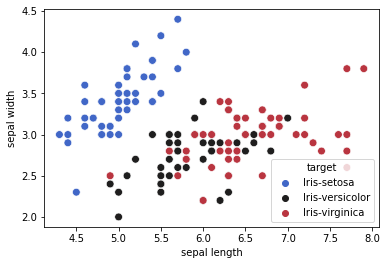

In [7]:
sb.scatterplot(data = df , x = 'sepal length',y = 'sepal width' , hue = 'target' , s = 60 , palette= 'icefire')

Vemos que los datos están muy mezclados por lo que debemos utilizar un analisis de componentes principales para ver mejor los resultados de este estudio.

Vamos a hacer el PCA por pasos aunque haya soluciones más rápidas para ello. Para hacerlo vamos a crear la función del PCA paso a paso para poder hacerlo con un solo paso.

In [13]:
def principal_components_analysis(X, num_components):

    # Data scalation
    X_scaled = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0)

    # Calculation of the covariance matrix
    cov_matrix = np.cov(X_scaled, rowvar = False)

    # Diagonalize (get eigenvalues ​​and associated eigenvectors)
    eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)

    # Order eigenvalues and eigenvectors
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigen_values = eigen_values[sorted_index]
    sorted_eigen_vectors = eigen_vectors[:, sorted_index]

    # Keep the desired components
    eigen_vectors_subset = sorted_eigen_vectors[:,0:num_components]

    # Project the new directions
    X_reduced = np.dot(eigen_vectors_subset.transpose(), X_scaled.transpose()).transpose()

    return X_reduced

Ahora que tenemos la función preparada, vamos a procesar los datos obtenidos al principio.

Debemos agrupar los datos en una matriz para poder pasarlos por la función que hemos creado anteriormente, y también debemos guardar la columna objetivo para representarlo más adelante, lo haremos con los siguientes comandos:

In [15]:
data = df.iloc[:,0:4]
target = df.iloc[:,4]

Visto que solo con dos variables podemos ver casi la totalidad de los datos pasaremos el dataset por la función para el analisis:

In [16]:
mat_reduced = principal_components_analysis(data, 2)
principal_df = pd.DataFrame(mat_reduced, columns = ['PC1', 'PC2'])
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)
principal_df.head()

,PC1,PC2,target
0,2.264542,0.505704,Iris-setosa
1,2.086426,-0.655405,Iris-setosa
2,2.367950,-0.318477,Iris-setosa
3,2.304197,-0.575368,Iris-setosa
4,2.388777,0.674767,Iris-setosa


Ahora vamos a representar la nueva tabla que hemos obtenido con la función que hemos creado anteriormente.

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

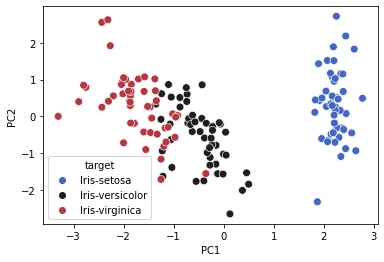

In [17]:
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')

Cómo podemos ver en la nueva representación, si la comparamos con la primera que hicimos, podemos clasificar de una forma más sencilla cada una de las especies de plantas que estamos analizando.